In [1]:
import numpy as np

from modelVelocity import ModelVelocity
from logProb import log_prob
from MCMC import MCMC
from readData import ReadData

import os
os.environ["OMP_NUM_THREADS"] = "1"

## Initilizations

Here we first read the data file, using the [ReadData](readData.py) object. This is just for conveniency, but it is simply a function that reads and stores the relevant numbers in the file [data.dat](data.dat). 

The second step is to initialize the [ModelVelocity](modelVelocity.py) object, which holds a number of values relevant for the modeling and creates the interpolated values of the F and g functions. See the [README file](README.md) for more details. 

Finally, we set the boundaries for each of the parameters to be used during the MCMC. 

In [2]:
#Read the measurements. 
data = ReadData()

In [3]:
#Initialize the modeling object. This takes some time as some functions need to be interpolated. 
modelv = ModelVelocity(data)

In [4]:
#Set the bounds for each of the parameters we will fit. 

#SMBH Mass
log_Mbh_min  , log_Mbh_max   = 0.0 , 11.0 #Base 10 logarithm of the SMBH mass in units of Solar Masses.

#Host Galaxy Parameters
n_host_min , n_host_max      = 0.50, 10.0 #Sersic index 
Re_host_min, Re_host_max     = 0.25, 10.0 #Effective radius in kpc. 
log_Mhost_min, log_Mhost_max = 8.0 , 12.0 #Base 10 logarithm of the total host mass in units of Solar Masses.

#Put the bounds in the right format and order for the MCMC. 
params_min = np.array([n_host_min,  log_Mhost_min, Re_host_min, log_Mbh_min])
params_max = np.array([n_host_max,  log_Mhost_max, Re_host_max, log_Mbh_max])

## Case 1: Fit All Parameters

Here we allow all 4 paremeters to be fit to the data. 

In [5]:
#Initial guesses. Order is n, log Mbulge, re bulge, log Mbh.
params_init = np.array([4.0, 10.5, 1.5, 10.])

#Set which parameters are fixed. In this case, it is none, so it is just an array of False values.
ifix  = np.zeros(params_init.shape, dtype=bool)

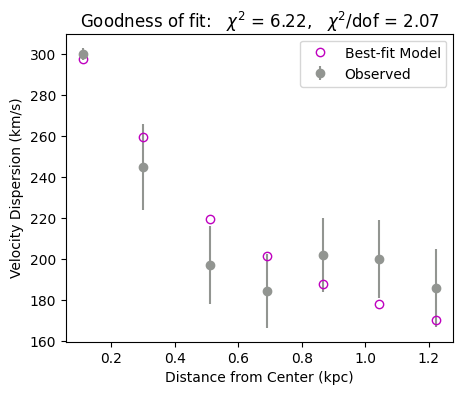

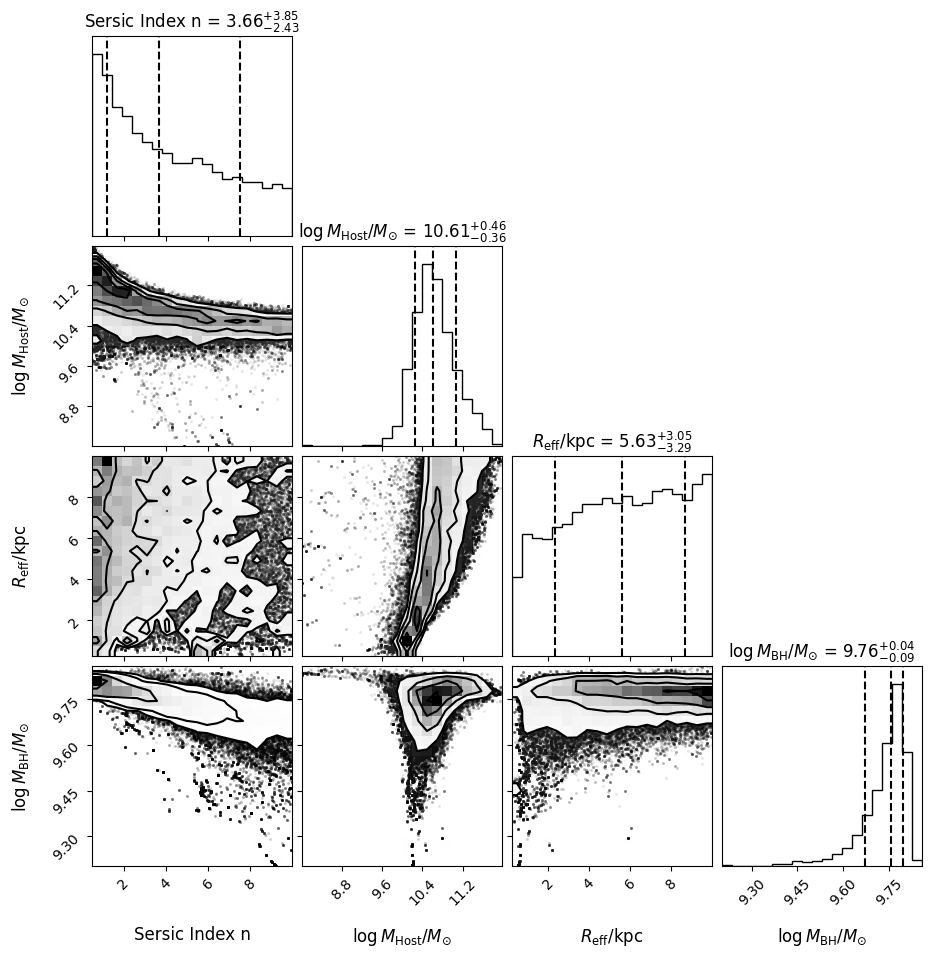

In [ ]:
#####
# MCMC
#####

#Set the MCMC object, which is just a convenient wrapper for emcee. 
myMCMC = MCMC(params_init, params_min, params_max, modelv, log_prob, data.sigma_obs, data.sigma_obs_err, ifix=ifix)

#Run th MCMC
myMCMC.runMCMC()

#Save the flatchain. 
myMCMC.save_flat_samples("MCMC_flatchain.all_params.txt")
#myMCMC.load_flat_samples("MCMC_flatchain.all_params.txt")

#Plot the best-fit model compared to the data. 
myMCMC.plot_bestfit()

#Make the corner plot.
myMCMC.corner_plot()

## Case 2: Fixing the Sérsic index and Effective Radius

It is clear from the corner plot of Case 1 that we cannot constrain the Sérsic index n and the Effective radius of the host. Hence, we will fix them to those of the [CII] integrated emission, which is also consistent with the distribution of the stellar UV emission in HST images [Diaz-Santos et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021A%26A...654A..37D/abstract). These are a Sérsic index of 0.5 (i.e., Gaussian) and an Effective Radius of 1.2kpc.

In [12]:
#Initial guesses. Order is n, log Mbulge, re bulge, log Mbh.
params_init = np.array([0.5, 10.5, 1.2, 10.])

#Set which parameters are fixed. In this case, it is none, so it is just an array of False values.
ifix  = np.zeros(params_init.shape, dtype=bool)
ifix[0] = True
ifix[2] = True

100%|██████████| 5000/5000 [09:35<00:00,  8.69it/s]


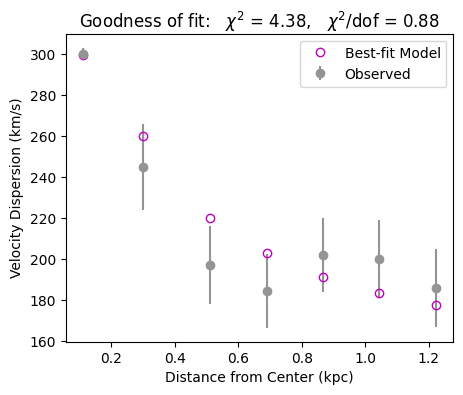

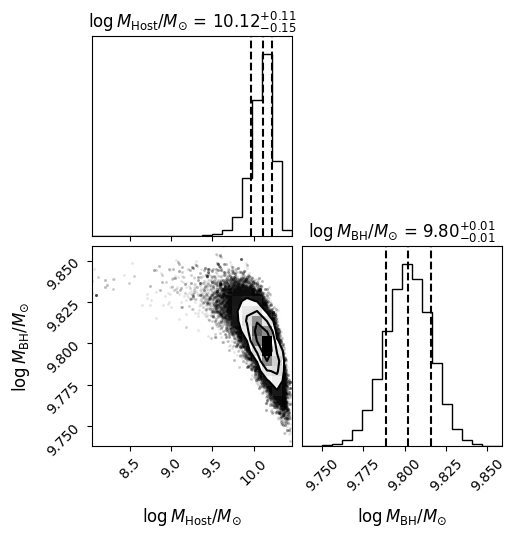

In [13]:
#####
# MCMC
#####

#Set the MCMC object, which is just a convenient wrapper for emcee. 
myMCMC = MCMC(params_init, params_min, params_max, modelv, log_prob, data.sigma_obs, data.sigma_obs_err, ifix=ifix)

#Run th MCMC
myMCMC.runMCMC()

#Save the flatchain. 
myMCMC.save_flat_samples("MCMC_flatchain.fixed_n_Re.txt")
#myMCMC.load_flat_samples("MCMC_flatchain.fixed_n_Re.txt")

#Plot the best-fit model compared to the data. 
myMCMC.plot_bestfit()

#Make the corner plot.
myMCMC.corner_plot()

## Case 3: No SMBH

We also need to compute the fit in the case where the gravity of the SMBH is negligible, and hence only the host component matters. 

In [14]:
#Initial guesses. Order is n, log Mbulge, re bulge, log Mbh.
params_init = np.array([4.0, 10.5, 1.5, 0.])

#Set which parameters are fixed. In this case, it is none, so it is just an array of False values.
ifix  = np.zeros(params_init.shape, dtype=bool)
ifix[3] = True

100%|██████████| 5000/5000 [07:32<00:00, 11.04it/s]


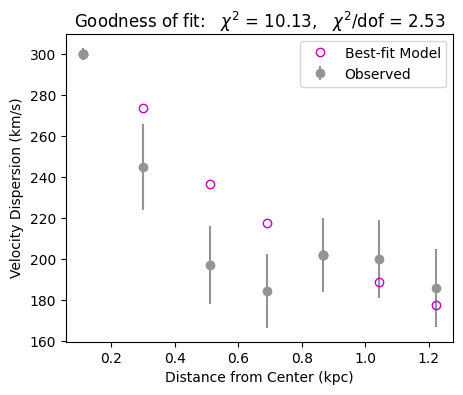

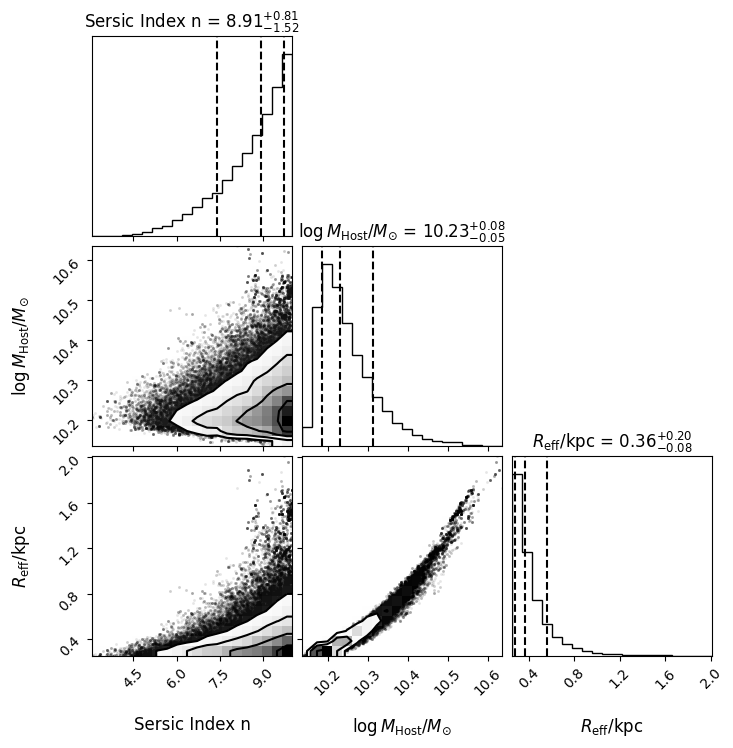

In [15]:
#####
# MCMC
#####

#Set the MCMC object, which is just a convenient wrapper for emcee. 
myMCMC = MCMC(params_init, params_min, params_max, modelv, log_prob, data.sigma_obs, data.sigma_obs_err, ifix=ifix)

#Run th MCMC
myMCMC.runMCMC()

#Save the flatchain. 
myMCMC.save_flat_samples("MCMC_flatchain.no_SMBH.txt")
#myMCMC.load_flat_samples("MCMC_flatchain.no_SMBH.txt")

#Plot the best-fit model compared to the data. 
myMCMC.plot_bestfit()

#Make the corner plot.
myMCMC.corner_plot()

## Case 4: No Host

Finally, for completeness, we also compute the fit in the case where the gravity is dominated at all scales by the SMBH with a negligible contribution from the host galaxy.

In [16]:
#Initial guesses. Order is n, log Mbulge, re bulge, log Mbh.
params_init = np.array([4.0, 0., 1.5, 10.])

#Set which parameters are fixed. In this case, it is none, so it is just an array of False values.
ifix  = np.zeros(params_init.shape, dtype=bool)
ifix[0:3] = True

100%|██████████| 5000/5000 [09:47<00:00,  8.52it/s]


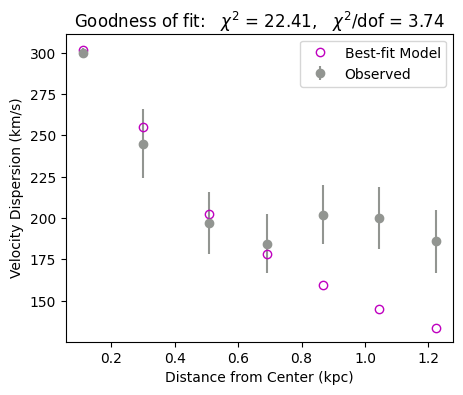

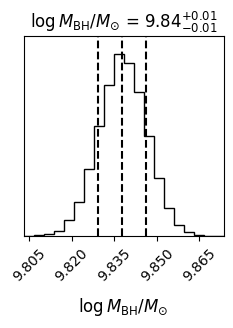

In [17]:
#####
# MCMC
#####

#Set the MCMC object, which is just a convenient wrapper for emcee. 
myMCMC = MCMC(params_init, params_min, params_max, modelv, log_prob, data.sigma_obs, data.sigma_obs_err, ifix=ifix)

#Run th MCMC
myMCMC.runMCMC()

#Save the flatchain. 
myMCMC.save_flat_samples("MCMC_flatchain.no_host.txt")
#myMCMC.load_flat_samples("MCMC_flatchain.no_host.txt")

#Plot the best-fit model compared to the data. 
myMCMC.plot_bestfit()

#Make the corner plot.
myMCMC.corner_plot()